# <center>图像形态学操作知多少</center>

By [青衣极客 Blue Geek](https://mp.weixin.qq.com/s/56k0euBUGB7fTYWrTbkw1g)

In 2020-01-21

近几年开始接触图像处理或者计算机视觉领域的朋友可能对形态学操作比较陌生，毕竟现在最火的是使用深度学习的方法来解决图像的基本问题。不过，这并不是说传统的图像处理方法没有用武之地。首先，熟知基础的图像处理方法是进行原始创新的基石；其次，传统方法的可解释性往往更强，这在一些工业生产中往往是极为重要的。现在很多生产流水线上工件的视觉检验仍然是使用基本的图像处理方法，虽然并不包含多么高深的策略，但是简单实用，鲁棒性高。

## 1. 二值化

图像的形态学操作包括：腐蚀、膨胀、开运算、闭运算以及梯度运算等等，这些操作都是基于二值图像的。对于彩色图或者灰度图，需要先转换成只有黑白两色的二值图像。OpenCV提供了threashold()函数专门完成这种工作。下面的例子就是将一张RGB的彩色图转换成二值图的示例。

<IPython.core.display.Javascript object>


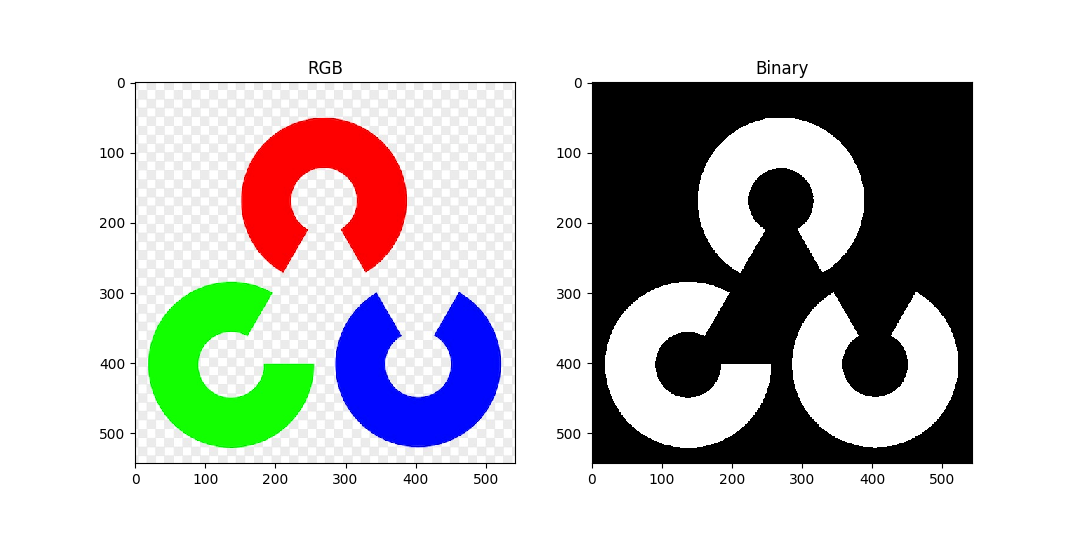

In [1]:
import cv2
import matplotlib 
%matplotlib notebook
import matplotlib.pyplot as plt

img = cv2.imread('../data/bg66/opencv-icon.png')
plt.figure(figsize=(10.8, 5.4))
# 原图
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('RGB')
# 二值化处理
plt.subplot(1,2,2)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
_, img = cv2.threshold(img, 200, 255, 1)
plt.imshow(img, cmap ='gray')
plt.title('Binary')
plt.savefig('../output/bg66/binary.png', dpi=300, bbox_inches='tight')

## 2. 腐蚀

腐蚀实际上就是模版与二值图像进行“与”操作，即模版在图像上逐像素滑动，只有模版全都覆盖到白色像素的时候结果图像中该像素位置为白色，否则为黑色。更加直观的理解就是“削皮”。“腐蚀”会将二值图像内的白色目标“削”去表面层，每迭代一次，大约“削”去模版大小的一半厚度的“皮”。这里就是用OpenCV的图标来演示一下OpenCV模块中提供的腐蚀操作。

<IPython.core.display.Javascript object>


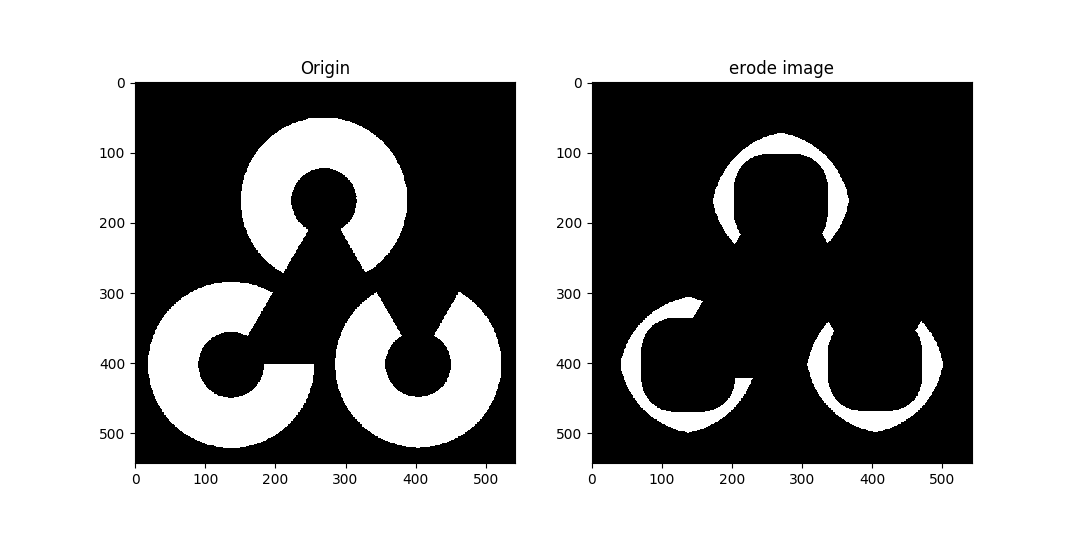

In [5]:
import numpy as np

plt.figure(figsize=(10.8, 5.4))
# 显示输入图
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Origin')
# 显示腐蚀图
plt.subplot(1,2,2)
kernel = np.ones((5,5), dtype=np.uint8)
erode_img = cv2.erode(img, kernel, iterations=10)
plt.imshow(erode_img, cmap='gray')
plt.title('erode image')
plt.savefig('../output/bg66/erode.png', dpi=300, bbox_inches='tight')

从腐蚀操作的结果图像看来，白色目标物体“变瘦”了一圈，“腐蚀”这个名字还是非常形象的。当然在实际运用的时候需要选择迭代次数，即要腐蚀到足够，又不能将目标全都腐蚀掉。

## 3. 膨胀

膨胀实际上就是模版与二值图像进行“或”操作，即模版在图像上逐像素滑动，只需模版覆盖到至少一个白色像素的时候结果图像中该像素位置为白色，否则为黑色。直观的理解就是“穿衣”，每次迭代都给白色目标穿上一层“衣服”，衣服的厚度大约为模版大小的一半。OpenCV提供了dilate()函数来完成这种操作，具体演示如下所示：

<IPython.core.display.Javascript object>


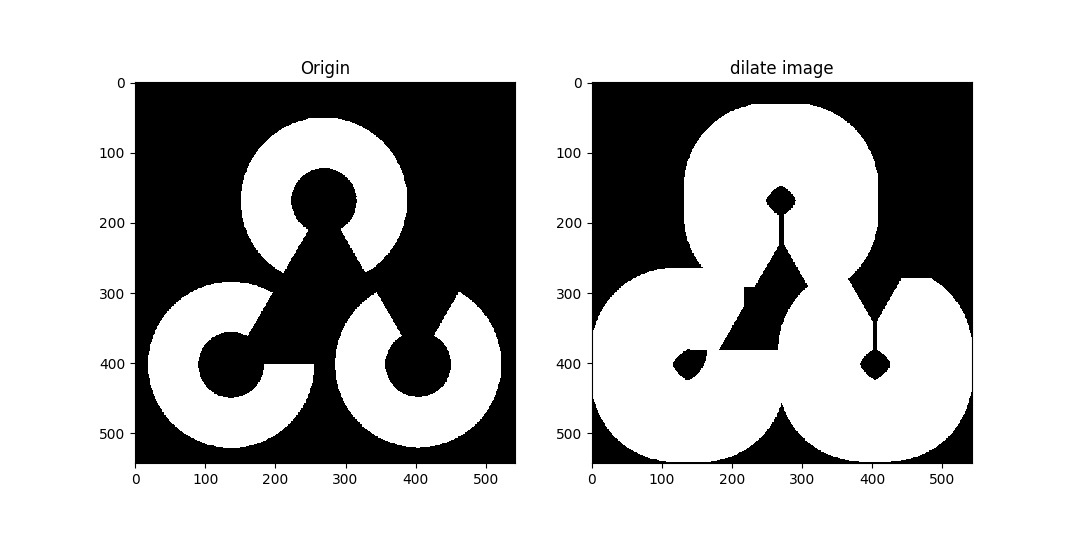

In [6]:
plt.figure(figsize=(10.8, 5.4))
# 显示原图
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Origin')
# 显示膨胀图
plt.subplot(1,2,2)
dilate_img = cv2.dilate(img, kernel, iterations=10)
plt.imshow(dilate_img, cmap='gray')
plt.title('dilate image')
plt.savefig('../output/bg66/dilate.png', dpi=300, bbox_inches='tight')

从以上的结果图像来看，“膨胀”这个名字也很形象，就像是吹气球一样填充了起来。

## 4. 开运算

先进行腐蚀操作后进行膨胀操作，合并起来就是“开运算”。乍一听还觉得这是吃饱撑的，但是仔细一想发现别有洞天。其原因就在于，腐蚀和膨胀这两个操作并不是完全的互逆运算，因为腐蚀和膨胀会造成一些结构的消失，这就是另一方运算无法恢复的。OpenCV提供了cv2.morphologyEx()函数，传送cv2.MORPH_OPEN参数就可以执行开运算。以下例程就是演示“开运算”的一个用途——消除图像中的“噪声点”，一般这些噪声点都是比较分立，且比较细小。

<IPython.core.display.Javascript object>


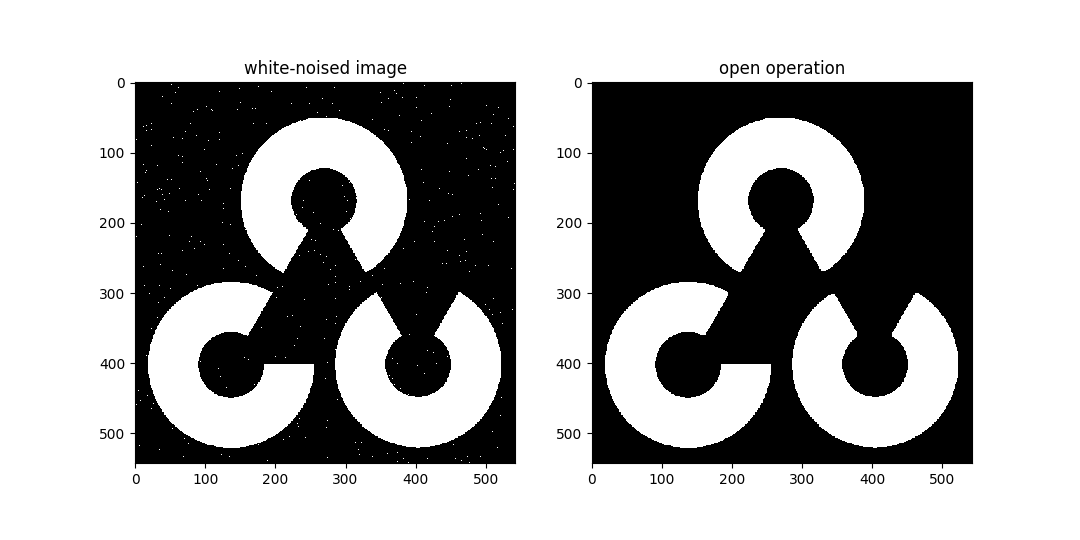

In [8]:
plt.figure(figsize=(10.8, 5.4))
# 在图像上加入随机噪声
plt.subplot(1,2,1)
x_rand = np.random.randint(img.shape[1], size=(1000))
y_rand = np.random.randint(img.shape[0], size=(1000))
n_img = img.copy()
n_img[y_rand, x_rand] = 255
plt.imshow(n_img, cmap='gray')
plt.title('white-noised image')
# 使用开运算
plt.subplot(1,2,2)
open_img = cv2.morphologyEx(n_img, cv2.MORPH_OPEN, kernel)
plt.imshow(open_img, cmap='gray')
plt.title('open operation')
plt.savefig('../output/bg66/open.png', dpi=300, bbox_inches='tight')

从结果图像看出，开运算将“噪声点”清除得很干净。当然这是生成的噪声点，基本上大小为一个像素，所以清理得比较干净。在实际情况中，可能需要调整模版的大小，从而有效应对。

## 5. 闭运算

既然有先腐蚀后膨胀的开运算，那么就应该也有先膨胀后腐蚀的“闭运算”。OpenCV提供了cv2.morphologyEx()函数，传送cv2.MORPH_CLOSE参数就可以执行闭运算。在实际应用中，闭运算常常被用于填补白色目标上存在的一些空洞。以下例子就展示了闭运算的这一用途。

<IPython.core.display.Javascript object>


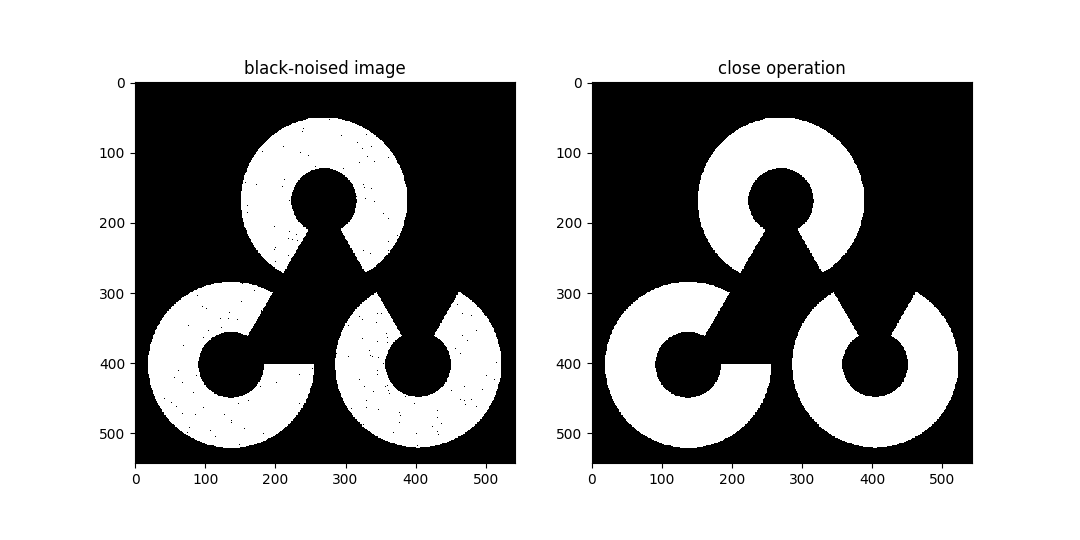

In [9]:
plt.figure(figsize=(10.8, 5.4))
# 在图像上加入随机噪声
plt.subplot(1,2,1)
x_rand = np.random.randint(img.shape[1], size=(1000))
y_rand = np.random.randint(img.shape[0], size=(1000))
n_img = img.copy()
n_img[y_rand, x_rand] = 0
plt.imshow(n_img, cmap='gray')
plt.title('black-noised image')
# 使用开运算
plt.subplot(1,2,2)
close_img = cv2.morphologyEx(n_img, cv2.MORPH_CLOSE, kernel)
plt.imshow(close_img, cmap='gray')
plt.title('close operation')
plt.savefig('../output/bg66/close.png', dpi=300, bbox_inches='tight')

从结果图看来，白色目标上一些细小的黑色空洞都已经被填补上了。还是需要注意一下，这里的空洞是人为生成的大小为一个像素的空洞，因此填补起来比较容易一些，如果空洞较大，那么填补就会出现问题，这是应当适当调整模版的大小。

## 6. 形态学梯度

还有一个比较常用的算子——形态学梯度。为什么不直接称为梯度？因为这里所说的“形态学梯度”与数学上的梯度存在相似性，但并不完全是“梯度”。“形态学梯度”的生成方式是原二值图像减去腐蚀之后的二值图像，这在表观上就是白色物体的轮廓。OpenCV提供了cv2.morphologyEx()函数，传送cv2.MORPH_GRADIENT参数就可以执行形态学梯度运算，示例如下：

<IPython.core.display.Javascript object>


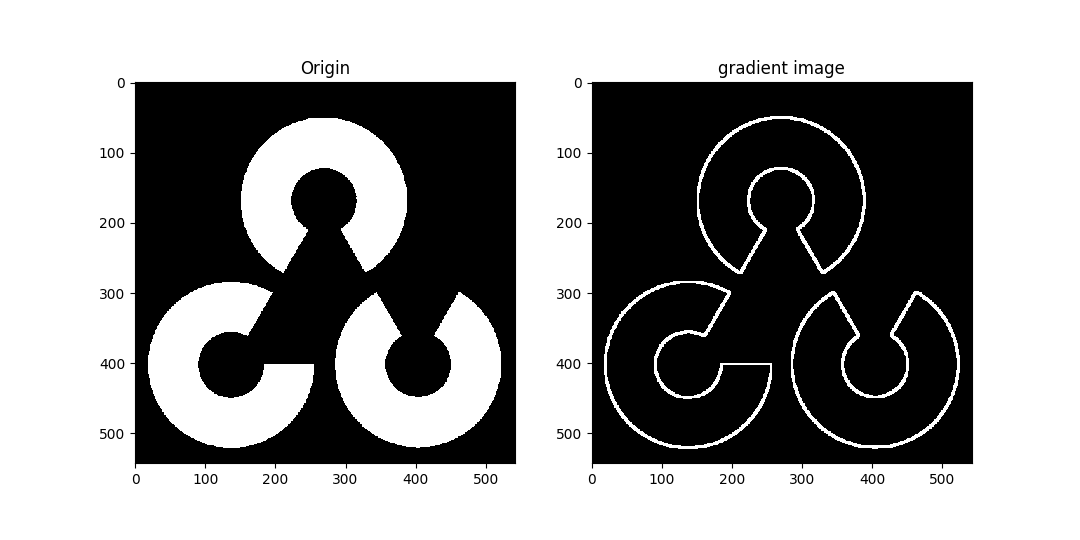

In [11]:
plt.figure(figsize=(10.8, 5.4))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Origin')
# 计算梯度图，也就是轮廓图
plt.subplot(1,2,2)
grad_img = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plt.imshow(grad_img, cmap='gray')
plt.title('gradient image')
plt.savefig('../output/bg66/grad.png', dpi=300, bbox_inches='tight')

结果图像表明形态学梯度能够提取白色目标的轮廓。通常这个操作用于获取边缘轮廓，为之后的目标定位和形状建模提供便利。

除了以上5个常用的形态学操作之外，还有其他一些操作，都是基本的形态学操作之间或者与原图之间操作的组合。掌握了基本的图像形态学操作，处理一些工业场景下的问题，比如工件形状、工件裂纹或者工件特定部位的位置等等任务就得心应手了。